IMPORTING THE LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

import pickle
%matplotlib inline

READING THE FILE

In [6]:
df=pd.read_csv("../Collect Dataset/autos.csv", header=0, sep=',', encoding='Latin1',)

READ DATASET

In [7]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


READING THE SHAPE(no. of rows, no. of columns)

In [8]:
df.shape

(371528, 20)

DROPPING THE COLUMNS CONTAINING NULL VALUES

In [9]:
df = df.dropna()

CLEANING THE DATASET

In [10]:
df.seller.value_counts()

privat        260954
gewerblich         2
Name: seller, dtype: int64

In [11]:
df.offerType.value_counts()

Angebot    260952
Gesuch          4
Name: offerType, dtype: int64

In [12]:
df[(df['powerPS'] < 50) | (df['powerPS'] > 900)]['powerPS'].unique()


array([    0,    45,    41,    44,    39,    23,  1398,    48,    33,
          43,   953,    46,    26,    40,    34,  1753, 10317,    47,
          18,    15,   952,    37,    22,    42,  2729,    21,  1240,
        1900,    29,    38,    14, 10520,    27,    20,    11,    25,
          12,    35,    49,  1659,     4,     1,     5,    17,  1625,
          24,    16,     9,    30,     8,     7,    19,    28, 17322,
        1360,  3750,  1062,    10,  1024, 11530,  1796,  1780,  2005,
        1800,  1399,  1500,    32,  1001,  1436,  1405,  1288,  1055,
        6226,  1115,  1223,  1968,  1920,  4400,     6,  1164, 11635,
        1703,  1910,    31,  1403,  5575,  1000,  4700,  1600,  2331,
          36,  6006,  5815,  1781,  1506, 15020,  5867,  1598, 17410,
        1363,  1054,  1700, 15001,  6045,     2,  6010,   903,  2000,
        1521,  1998,  1230,  8259,   909,  1595, 17700, 11011,  1199,
        1162, 15033, 16312, 20000,   950,  1021, 11620, 13636,  9710,
        2009,  6062,

In [13]:
df[(df['yearOfRegistration'] < 1949) | (df['yearOfRegistration'] > 2017)]['yearOfRegistration'].unique()

array([1945, 1937, 1936, 1948, 1932, 1931, 2018, 1942, 1910, 1923, 1930,
       1943, 1938, 1941, 1934, 1919, 1939, 1929, 1933, 1947])

In [14]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [15]:
df=df.drop('seller',axis=1)

In [16]:
df.shape

(260956, 19)

In [17]:
df=df.drop('offerType',axis=1)

In [18]:
df.shape

(260956, 18)

In [19]:
df=df[(df.powerPS > 50) & (df.powerPS < 900)]

In [20]:
df.shape

(244748, 18)

In [21]:
df = df[(df.yearOfRegistration >= 1950) & (df.yearOfRegistration < 2018)]

In [22]:
df.shape

(244731, 18)

In [23]:
df = df[(df.price >= 100) & (df.price <= 150000)]


DROPPING THE UNWANTED COLUMNS

In [24]:
df.drop(['name', 'abtest', 'dateCrawled', 'nrOfPictures', 'lastSeen',
         'postalCode','dateCreated'], axis='columns',inplace=True)

In [25]:
df.shape

(241400, 11)

In [26]:
final_df = df.copy()

DROPPING THE DUPLICATE COLUMNS

In [27]:
final_df = final_df.drop_duplicates ([ 'price', 'vehicleType', 'yearOfRegistration'
                                  ,'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType'
                                  ,'notRepairedDamage'])

REPLACING THE UNKNOWN VALUES WITH KNOWN VALUES

In [28]:
final_df['gearbox'].unique()

array(['manuell', 'automatik'], dtype=object)

In [29]:
final_df['fuelType'].unique()

array(['benzin', 'diesel', 'lpg', 'andere', 'hybrid', 'cng', 'elektro'],
      dtype=object)

In [30]:
final_df['vehicleType'].unique()

array(['kleinwagen', 'limousine', 'cabrio', 'kombi', 'suv', 'bus',
       'coupe', 'andere'], dtype=object)

In [31]:
final_df['notRepairedDamage'].unique()

array(['nein', 'ja'], dtype=object)

In [32]:
final_df.gearbox.replace(('manuell', 'automatik'), ('manual', 'automatic'), inplace=True)
final_df.fuelType.replace(('benzin', 'andere', 'elektro'), ('petrol', 'others', 'electric'), inplace=True)
final_df.vehicleType.replace(('kleinwagen', 'cabrio', 'kombi', 'andere'), 
                           ('small car', 'convertible', 'combination', 'others'), inplace=True)
final_df.notRepairedDamage.replace(('ja', 'nein'), ('Yes', 'No'),inplace=True)


FILLING THE NA VALUES

In [33]:
final_df['notRepairedDamage'].fillna(value='not-declared', inplace=True)
final_df[ 'fuelType'].fillna(value='not-declared', inplace=True)
final_df[ 'gearbox'].fillna(value='not-declared', inplace=True)
final_df[ 'vehicleType'].fillna (value='not-declared', inplace=True)
final_df['model'].fillna(value='not-declared',inplace=True)


In [34]:
final_df.to_csv("preprocessed_final_data.csv")


VISUALIZING THE DATA

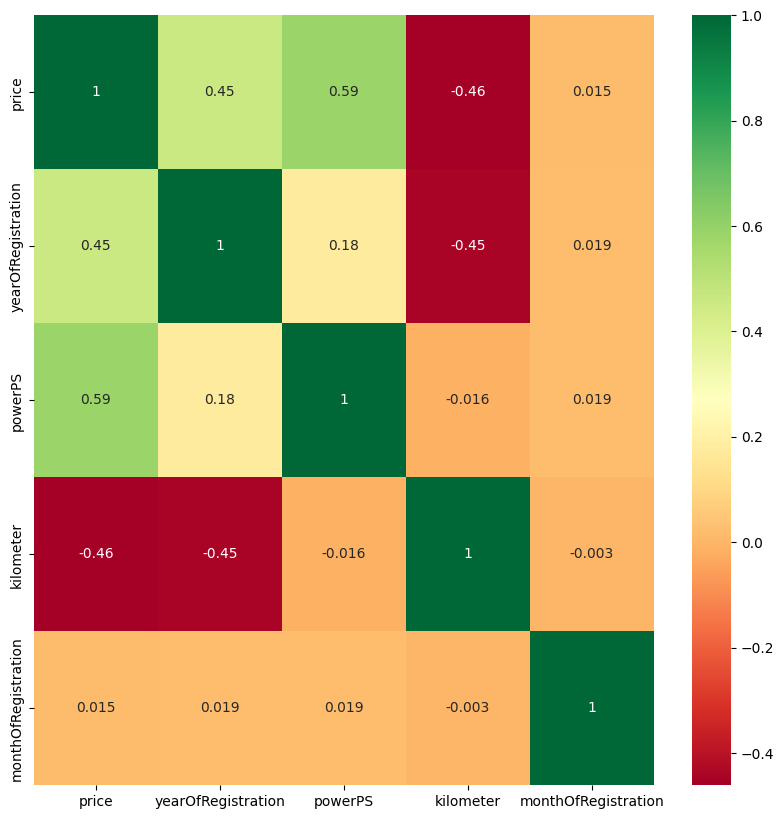

In [36]:
corrmat = final_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

g=sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

LABEL ENCODING THE DATA

In [37]:
labels = ['gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']

columnMapper = {}
for i in labels:
    columnMapper[i]=LabelEncoder()
    columnMapper[i].fit(final_df[i])
    tr = columnMapper[i].transform(final_df[i])
    np.save(str('classes'+i+ '.npy'), columnMapper[i].classes_)
    print(i, ":",columnMapper[i])
    final_df.loc[:, i + '_labels'] = pd.Series (tr, index=final_df.index)

gearbox : LabelEncoder()
notRepairedDamage : LabelEncoder()
model : LabelEncoder()
brand : LabelEncoder()
fuelType : LabelEncoder()
vehicleType : LabelEncoder()


In [38]:
labeled_final_df = final_df[ ['price'
                 ,'yearOfRegistration'
                 ,'powerPS'
                 ,'kilometer'
                 ,'monthOfRegistration'
                ]
               + [x+"_labels" for x in labels]]

In [39]:
labeled_final_df.columns

Index(['price', 'yearOfRegistration', 'powerPS', 'kilometer',
       'monthOfRegistration', 'gearbox_labels', 'notRepairedDamage_labels',
       'model_labels', 'brand_labels', 'fuelType_labels',
       'vehicleType_labels'],
      dtype='object')